In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('satisfaction.csv')
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [4]:
df.columns

Index(['id', 'satisfaction_v2', 'gender', 'customer_type', 'age',
       'type_of_travel', 'class', 'flight_distance', 'seat_comfort',
       'departure/arrival_time_convenient', 'food_and_drink', 'gate_location',
       'inflight_wifi_service', 'inflight_entertainment', 'online_support',
       'ease_of_online_booking', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes'],
      dtype='object')

In [5]:
df.isna().sum()

id                                     0
satisfaction_v2                        0
gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
seat_comfort                           0
departure/arrival_time_convenient      0
food_and_drink                         0
gate_location                          0
inflight_wifi_service                  0
inflight_entertainment                 0
online_support                         0
ease_of_online_booking                 0
on-board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
cleanliness                            0
online_boarding                        0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
dtype: int64

In [6]:
df = df.dropna()
df.shape
df.isna().sum()

id                                   0
satisfaction_v2                      0
gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
seat_comfort                         0
departure/arrival_time_convenient    0
food_and_drink                       0
gate_location                        0
inflight_wifi_service                0
inflight_entertainment               0
online_support                       0
ease_of_online_booking               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
cleanliness                          0
online_boarding                      0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
dtype: int64

In [7]:
df[df['satisfaction_v2'] != 'satisfied'].head().T

,795,799,803,804,805
id,123730,32873,87865,46711,41931
satisfaction_v2,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied
gender,Male,Male,Male,Male,Male
customer_type,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
age,48,30,19,13,31
type_of_travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel
class,Eco Plus,Eco,Eco,Eco,Eco
flight_distance,1201,1582,1737,1351,1109
seat_comfort,1,1,1,1,1
departure/arrival_time_convenient,0,0,0,0,0


In [8]:
df.satisfaction_v2.value_counts()

satisfaction_v2
satisfied                  70882
neutral or dissatisfied    58605
Name: count, dtype: int64

In [9]:
df.dtypes

id                                     int64
satisfaction_v2                       object
gender                                object
customer_type                         object
age                                    int64
type_of_travel                        object
class                                 object
flight_distance                        int64
seat_comfort                           int64
departure/arrival_time_convenient      int64
food_and_drink                         int64
gate_location                          int64
inflight_wifi_service                  int64
inflight_entertainment                 int64
online_support                         int64
ease_of_online_booking                 int64
on-board_service                       int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
cleanliness                            int64
online_boarding                        int64
departure_

In [10]:
categorical = list(df.select_dtypes(include='object').columns)
categorical

['satisfaction_v2', 'gender', 'customer_type', 'type_of_travel', 'class']

In [11]:
numerical = list(df.select_dtypes(exclude='object').columns)
numerical

['id',
 'age',
 'flight_distance',
 'seat_comfort',
 'departure/arrival_time_convenient',
 'food_and_drink',
 'gate_location',
 'inflight_wifi_service',
 'inflight_entertainment',
 'online_support',
 'ease_of_online_booking',
 'on-board_service',
 'leg_room_service',
 'baggage_handling',
 'checkin_service',
 'cleanliness',
 'online_boarding',
 'departure_delay_in_minutes',
 'arrival_delay_in_minutes']

In [12]:
df_full_train, df_val = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_test = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = df_train.satisfaction_v2
y_test = df_test.satisfaction_v2
y_val = df_val.satisfaction_v2

In [13]:
(len(df_train)+len(df_test)+len(df_val)), len(df)

(129487, 129487)

In [14]:
len(y_train) == len(df_train)

True

In [15]:
del df_train['satisfaction_v2']
del df_test['satisfaction_v2']
del df_val['satisfaction_v2']

In [16]:
df_train

,id,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,...,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,79542,Male,Loyal Customer,42,Business travel,Eco,1792,3,5,5,...,3,3,3,1,4,3,3,3,9,0.0
1,120097,Female,Loyal Customer,10,Personal Travel,Business,3106,4,4,4,...,2,2,4,3,3,5,5,2,18,3.0
2,56694,Female,Loyal Customer,50,Personal Travel,Eco,1133,5,4,4,...,5,5,1,5,4,1,5,5,0,0.0
3,124470,Female,Loyal Customer,14,Personal Travel,Eco,2422,3,3,3,...,5,3,5,3,4,5,4,5,0,0.0
4,124039,Female,Loyal Customer,30,Business travel,Business,3575,0,5,0,...,5,5,5,3,5,5,5,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77686,64309,Male,Loyal Customer,54,Business travel,Business,3311,2,2,2,...,5,4,4,4,4,5,4,4,36,9.0
77687,110394,Male,Loyal Customer,51,Business travel,Business,3031,2,2,5,...,4,5,5,5,5,3,5,3,96,88.0
77688,98250,Female,Loyal Customer,48,Business travel,Business,2240,5,5,5,...,4,4,4,5,4,5,4,3,0,0.0
77689,60823,Male,Loyal Customer,59,Personal Travel,Eco,1417,3,4,3,...,3,3,4,5,5,4,4,3,0,0.0


In [17]:
categorical = list(df_train.select_dtypes(include='object').columns)
categorical

['gender', 'customer_type', 'type_of_travel', 'class']

In [18]:
numerical = list(df_train.select_dtypes(exclude='object').columns)
numerical

['id',
 'age',
 'flight_distance',
 'seat_comfort',
 'departure/arrival_time_convenient',
 'food_and_drink',
 'gate_location',
 'inflight_wifi_service',
 'inflight_entertainment',
 'online_support',
 'ease_of_online_booking',
 'on-board_service',
 'leg_room_service',
 'baggage_handling',
 'checkin_service',
 'cleanliness',
 'online_boarding',
 'departure_delay_in_minutes',
 'arrival_delay_in_minutes']

In [19]:
def mutual_info_y_score(series):
    return mutual_info_score(series, df_full_train.satisfaction_v2)
    

In [20]:
mutual_info = df_full_train[categorical].apply(mutual_info_y_score)
mi_score = mutual_info.sort_values(ascending=False).to_frame(name='MI_SCORES')
mi_score

,MI_SCORES
class,0.049459
customer_type,0.043830
gender,0.022156
type_of_travel,0.005864


In [21]:
## Type of travel & gender seem to be of relatively less important features

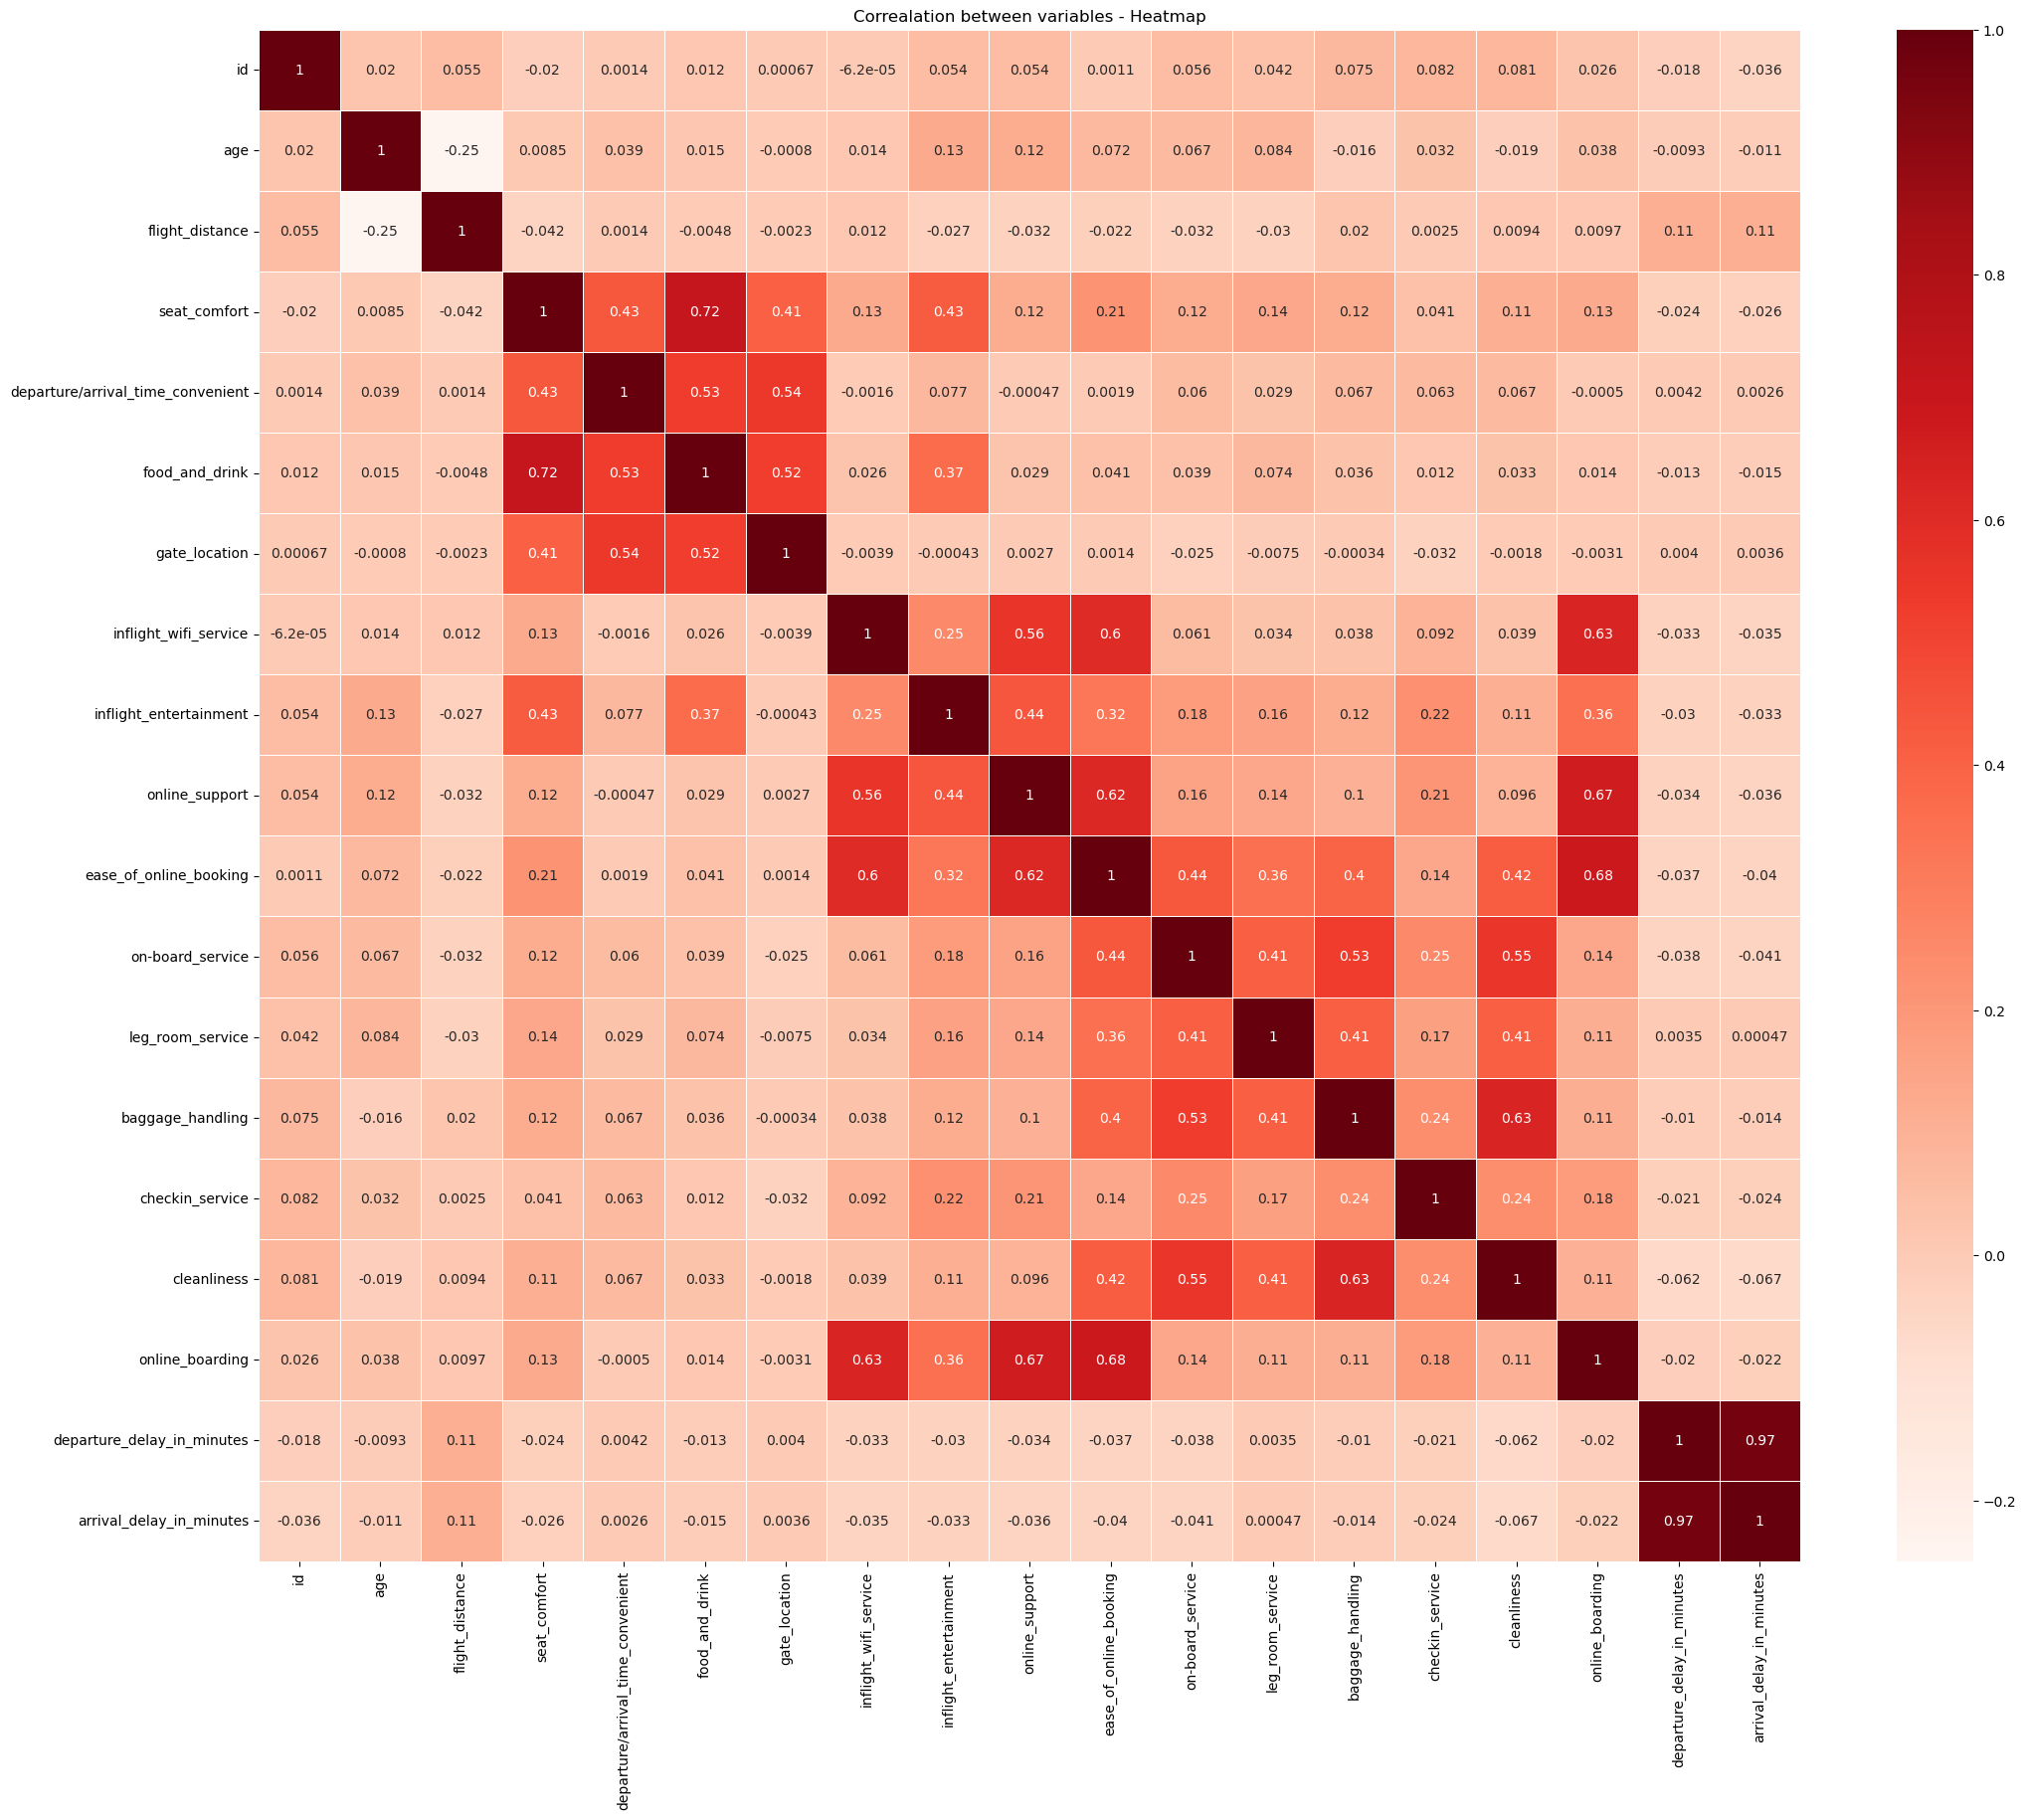

In [22]:
plt.figure(figsize=(25,20))
sns.heatmap(df[numerical].corr(), annot=True, linewidth=.6, cmap="Reds")
plt.title("Correalation between variables - Heatmap")
plt.show()

In [23]:
df[numerical].corr().unstack().sort_values(ascending=False)[:60]

id                                 id                                   1.000000
ease_of_online_booking             ease_of_online_booking               1.000000
seat_comfort                       seat_comfort                         1.000000
departure/arrival_time_convenient  departure/arrival_time_convenient    1.000000
food_and_drink                     food_and_drink                       1.000000
gate_location                      gate_location                        1.000000
inflight_wifi_service              inflight_wifi_service                1.000000
inflight_entertainment             inflight_entertainment               1.000000
on-board_service                   on-board_service                     1.000000
age                                age                                  1.000000
leg_room_service                   leg_room_service                     1.000000
baggage_handling                   baggage_handling                     1.000000
checkin_service             

In [24]:
train_dicts = df_train.to_dict(orient='records')

In [25]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [26]:
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)


DecisionTreeClassifier()

In [27]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [28]:
y_pred = dc.predict(X_val)

In [29]:
y_pred

array(['satisfied', 'neutral or dissatisfied', 'neutral or dissatisfied',
       ..., 'neutral or dissatisfied', 'satisfied',
       'neutral or dissatisfied'], dtype=object)

In [30]:
y_val

0                      satisfied
1        neutral or dissatisfied
2        neutral or dissatisfied
3                      satisfied
4        neutral or dissatisfied
                  ...           
25893    neutral or dissatisfied
25894                  satisfied
25895    neutral or dissatisfied
25896                  satisfied
25897    neutral or dissatisfied
Name: satisfaction_v2, Length: 25898, dtype: object

In [31]:
score = accuracy_score(y_val, y_pred)
score

0.9358637732643448

In [32]:
sample_rec = train_dicts[2]
sample_rec

{'id': 56694,
 'gender': 'Female',
 'customer_type': 'Loyal Customer',
 'age': 50,
 'type_of_travel': 'Personal Travel',
 'class': 'Eco',
 'flight_distance': 1133,
 'seat_comfort': 5,
 'departure/arrival_time_convenient': 4,
 'food_and_drink': 4,
 'gate_location': 4,
 'inflight_wifi_service': 5,
 'inflight_entertainment': 5,
 'online_support': 5,
 'ease_of_online_booking': 5,
 'on-board_service': 1,
 'leg_room_service': 5,
 'baggage_handling': 4,
 'checkin_service': 1,
 'cleanliness': 5,
 'online_boarding': 5,
 'departure_delay_in_minutes': 0,
 'arrival_delay_in_minutes': 0.0}

In [33]:
y_train.iloc[2]

'satisfied'

In [34]:
X_small = dv.transform([sample_rec])

In [35]:
y_small_pred = dc.predict(X_small)

In [36]:
y_small_pred

array(['satisfied'], dtype=object)

In [37]:
sample_rec = train_dicts[100]
sample_rec

{'id': 105080,
 'gender': 'Male',
 'customer_type': 'disloyal Customer',
 'age': 39,
 'type_of_travel': 'Business travel',
 'class': 'Business',
 'flight_distance': 1939,
 'seat_comfort': 3,
 'departure/arrival_time_convenient': 3,
 'food_and_drink': 3,
 'gate_location': 5,
 'inflight_wifi_service': 1,
 'inflight_entertainment': 3,
 'online_support': 1,
 'ease_of_online_booking': 1,
 'on-board_service': 4,
 'leg_room_service': 3,
 'baggage_handling': 4,
 'checkin_service': 5,
 'cleanliness': 5,
 'online_boarding': 1,
 'departure_delay_in_minutes': 11,
 'arrival_delay_in_minutes': 9.0}

In [38]:
y_train[100]

'neutral or dissatisfied'

In [39]:
y_small_pred = dc.predict(dv.transform([sample_rec]))
y_small_pred


array(['neutral or dissatisfied'], dtype=object)

In [40]:
sample_rec = val_dicts[100]
y_val[100]


'neutral or dissatisfied'

In [41]:
X_small = dv.transform([sample_rec])
y_small_pred1 = dc.predict(X_small)

In [42]:
y_small_pred1

array(['neutral or dissatisfied'], dtype=object)

In [43]:
print(export_text(dc, feature_names=list(dv.get_feature_names_out())))

|--- inflight_entertainment <= 3.50
|   |--- seat_comfort <= 3.50
|   |   |--- seat_comfort <= 0.50
|   |   |   |--- online_boarding <= 0.50
|   |   |   |   |--- class: neutral or dissatisfied
|   |   |   |--- online_boarding >  0.50
|   |   |   |   |--- class: satisfied
|   |   |--- seat_comfort >  0.50
|   |   |   |--- class=Business <= 0.50
|   |   |   |   |--- flight_distance <= 916.50
|   |   |   |   |   |--- type_of_travel=Personal Travel <= 0.50
|   |   |   |   |   |   |--- online_boarding <= 4.50
|   |   |   |   |   |   |   |--- online_support <= 4.50
|   |   |   |   |   |   |   |   |--- checkin_service <= 4.50
|   |   |   |   |   |   |   |   |   |--- inflight_entertainment <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- online_support <= 3.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- online_support >  3.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   | 

In [44]:
## Our model got good accuracy score without any tuning. For experimentation sake lets reduce the tree depth and see how it affects
# the accuracy 

In [50]:
dc = DecisionTreeClassifier(max_depth=9)
dc.fit(X_train, y_train)
y_pred = dc.predict(X_val)

In [55]:
score = accuracy_score(y_val, y_pred)
score

0.9308440806239864